In [1]:
import openmc

In [2]:
fuel_material = openmc.Material(name="Natural UO2 Fuel")
fuel_material.add_nuclide('U235', 0.0072)  
fuel_material.add_nuclide('U238', 0.9928) 
fuel_material.add_element('O', 2)
fuel_material.set_density('g/cm3', 10.5)  

In [3]:
cladding = openmc.Material(name="Zirconium Cladding")
cladding.add_element('Zr', 1)
cladding.set_density('g/cm3', 6.55)  

In [4]:
coolant = openmc.Material(name="Heavy Water (D2O)")
coolant.add_element('H', 2)  
coolant.add_element('O', 1)
coolant.set_density('g/cm3', 1.11)  

In [5]:
materials = openmc.Materials([fuel_material, cladding, coolant])

In [6]:
materials.export_to_xml()

In [7]:
!cat materials.xml

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material depletable="true" id="1" name="Natural UO2 Fuel">
    <density units="g/cm3" value="10.5"/>
    <nuclide ao="0.0072" name="U235"/>
    <nuclide ao="0.9928" name="U238"/>
    <nuclide ao="1.999242" name="O16"/>
    <nuclide ao="0.000758" name="O17"/>
  </material>
  <material id="2" name="Zirconium Cladding">
    <density units="g/cm3" value="6.55"/>
    <nuclide ao="0.5145" name="Zr90"/>
    <nuclide ao="0.1122" name="Zr91"/>
    <nuclide ao="0.1715" name="Zr92"/>
    <nuclide ao="0.1738" name="Zr94"/>
    <nuclide ao="0.028" name="Zr96"/>
  </material>
  <material id="3" name="Heavy Water (D2O)">
    <density units="g/cm3" value="1.11"/>
    <nuclide ao="1.99968852" name="H1"/>
    <nuclide ao="0.00031148" name="H2"/>
    <nuclide ao="0.999621" name="O16"/>
    <nuclide ao="0.000379" name="O17"/>
  </material>
</materials>


In [8]:
fuel_or = openmc.ZCylinder(r=0.39)
clad_ir = openmc.ZCylinder(r=0.40)
clad_or = openmc.ZCylinder(r=0.46)

pitch = 1.26
left = openmc.XPlane(x0=-pitch/2, boundary_type='reflective')
right = openmc.XPlane(x0=pitch/2, boundary_type='reflective')
bottom = openmc.YPlane(y0=-pitch/2, boundary_type='reflective')
top = openmc.YPlane(y0=pitch/2, boundary_type='reflective')

In [9]:
fuel_region = -fuel_or
gap_region = +fuel_or & -clad_ir
clad_region = +clad_ir & -clad_or
water_region = +left & -right & +bottom & -top & +clad_or

In [10]:
fuel_cell = openmc.Cell(name="Fuel")
fuel_cell.fill = fuel_material
fuel_cell.region = fuel_region

gap_cell = openmc.Cell(name="Gap")
gap_cell.fill = None
gap_cell.region = gap_region

clad_cell = openmc.Cell(name="Cladding")
clad_cell.fill = cladding
clad_cell.region = clad_region

moderator_cell = openmc.Cell(name="Moderator")
moderator_cell.fill = coolant
moderator_cell.region = water_region


In [11]:
root = openmc.Universe()
root.add_cells((fuel_cell, gap_cell, clad_cell, moderator_cell))

g = openmc.Geometry()
g.root_universe = root
g.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='UTF-8'?>
<geometry>
  <cell id="1" material="1" name="Fuel" region="-1" universe="1"/>
  <cell id="2" material="void" name="Gap" region="1 -2" universe="1"/>
  <cell id="3" material="2" name="Cladding" region="2 -3" universe="1"/>
  <cell id="4" material="3" name="Moderator" region="4 -5 6 -7 3" universe="1"/>
  <surface coeffs="0.0 0.0 0.39" id="1" type="z-cylinder"/>
  <surface coeffs="0.0 0.0 0.4" id="2" type="z-cylinder"/>
  <surface coeffs="0.0 0.0 0.46" id="3" type="z-cylinder"/>
  <surface boundary="reflective" coeffs="-0.63" id="4" type="x-plane"/>
  <surface boundary="reflective" coeffs="0.63" id="5" type="x-plane"/>
  <surface boundary="reflective" coeffs="-0.63" id="6" type="y-plane"/>
  <surface boundary="reflective" coeffs="0.63" id="7" type="y-plane"/>
</geometry>


In [12]:
p = openmc.Plot()

In [13]:
p.width = [pitch, pitch]
p.pixels = [400, 400]
p.color_by = 'material'
p.colors = {fuel_material:'Orange', coolant:'cyan', cladding:'gray'}

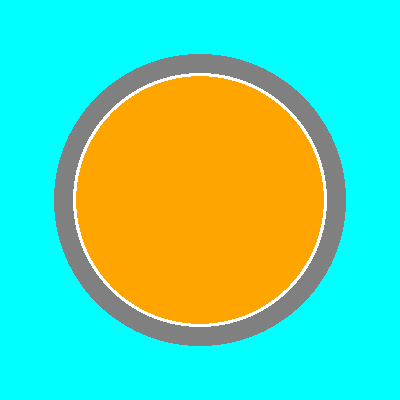

In [14]:
openmc.plot_inline(p)

In [15]:
settings = openmc.Settings()
settings.batches = 100  
settings.inactive = 10  
settings.particles = 1000  
settings.source = openmc.Source(space=openmc.stats.Box(
    [-pitch/2, -pitch/2, -10],
    [pitch/2, pitch/2, 10],
    only_fissionable=True
))
settings.export_to_xml()

/home/kavya/anaconda3/envs/openmc/lib/python3.13/site-packages/openmc/stats/multivariate.py:943: FutureWarning: The 'only_fissionable' has been deprecated. Use the 'constraints' argument when defining a source instead.
  warn("The 'only_fissionable' has been deprecated. Use the "
/home/kavya/anaconda3/envs/openmc/lib/python3.13/site-packages/openmc/source.py:658: FutureWarning: This class is deprecated in favor of 'IndependentSource'
  warnings.warn("This class is deprecated in favor of 'IndependentSource'", FutureWarning)


In [16]:
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################